<a href="https://colab.research.google.com/github/ad-batrisyia/money-laundering-detection-ml/blob/main/notebooks/01_data_preparation_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**IMPORT FILES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from PIL import Image
from scipy.stats import skew
from matplotlib.transforms import Bbox
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path
file_path = '/content/drive/My Drive/Money Laundering Detection/SAML-D.csv'

# Load the dataset
import pandas as pd
df = pd.read_csv(file_path)

###DATA PREPARATION

In [ ]:
df.shape

(9504852, 12)

In [ ]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [ ]:
df.tail()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
9504851,10:57:12,2023-08-23,105185176,6824994831,9586.08,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out


In [ ]:
#Info Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [ ]:
#Check data types
print('Data Types:')
print(df.dtypes)

Data Types:
Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object


In [ ]:
#Identify payment types
print(df['Payment_type'].value_counts())

Payment_type
Credit card        2012909
Debit card         2012103
Cheque             2011419
ACH                2008807
Cross-border        933931
Cash Withdrawal     300477
Cash Deposit        225206
Name: count, dtype: int64


In [ ]:
PaymentType_Table = df.groupby(['Payment_type', 'Is_laundering'])['Payment_type'].value_counts().unstack()
PaymentType_Table

Is_laundering,0,1
Payment_type,,
ACH,2007648,1159
Cash Deposit,223801,1405
Cash Withdrawal,299143,1334
Cheque,2010332,1087
Credit card,2011773,1136
Cross-border,931303,2628
Debit card,2010979,1124


In [ ]:
#Identify currency involved
#Combined unique currency across both columns
combined_unique_currency = pd.unique(df[['Payment_currency', 'Received_currency']].values.ravel())
print(combined_unique_currency)

['UK pounds' 'Dirham' 'Indian rupee' 'Pakistani rupee' 'Euro' 'US dollar'
 'Mexican Peso' 'Albanian lek' 'Turkish lira' 'Naira' 'Swiss franc' 'Yen'
 'Moroccan dirham']


In [ ]:
#Identify bank locations
#Combined unique location across both columns
combined_unique_location = pd.unique(df[['Sender_bank_location', 'Receiver_bank_location']].values.ravel())
print(combined_unique_location)

['UK' 'UAE' 'Spain' 'France' 'USA' 'Mexico' 'Albania' 'Turkey' 'Nigeria'
 'Switzerland' 'Italy' 'Germany' 'Japan' 'Austria' 'Netherlands' 'India'
 'Pakistan' 'Morocco']


In [ ]:
print(df['Payment_type'].unique())

['Cash Deposit' 'Cross-border' 'Cheque' 'ACH' 'Credit card' 'Debit card'
 'Cash Withdrawal']


In [ ]:
print(df['Laundering_type'].unique())

['Normal_Cash_Deposits' 'Normal_Fan_Out' 'Normal_Small_Fan_Out'
 'Normal_Fan_In' 'Normal_Group' 'Normal_Cash_Withdrawal'
 'Normal_Periodical' 'Normal_Foward' 'Normal_Mutual' 'Smurfing'
 'Normal_Plus_Mutual' 'Normal_single_large' 'Cash_Withdrawal'
 'Behavioural_Change_2' 'Structuring' 'Behavioural_Change_1'
 'Layered_Fan_In' 'Layered_Fan_Out' 'Scatter-Gather' 'Cycle' 'Fan_In'
 'Stacked Bipartite' 'Over-Invoicing' 'Deposit-Send' 'Single_large'
 'Bipartite' 'Gather-Scatter' 'Fan_Out']


In [ ]:
#Identify number of normal & laundering transactions
print(df['Is_laundering'].value_counts())

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64


In [ ]:
#Identify laundering types
print(df['Laundering_type'].value_counts())

Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54
Name: count, dtype: int64


In [ ]:
#Identify numbers of unique sender account
unique_SenderAccounts = df['Sender_account'].nunique()
print(f"Number of unique sender accounts: {unique_SenderAccounts}")

#Identify numbers of unique receiver account
unique_ReceiverAccounts = df['Receiver_account'].nunique()
print(f"Number of unique receiver accounts: {unique_ReceiverAccounts}")

Number of unique sender accounts: 292715
Number of unique receiver accounts: 652266


####DATA TYPE TRANSFORMATION

In [ ]:
# Define the mapping dictionary
laundering_structure_map = {
    'Normal_Cash_Deposits': 'Cash_Deposit',
    'Normal_Fan_Out': 'Fan-Out',
    'Normal_Small_Fan_Out': 'Fan-Out',
    'Layered_Fan_Out': 'Fan-Out',
    'Fan_Out': 'Fan-Out',
    'Normal_Fan_In': 'Fan-In',
    'Layered_Fan_In': 'Fan-In',
    'Fan_In': 'Fan-In',
    'Normal_Cash_Withdrawal': 'Cash_Withdrawal',
    'Cash_Withdrawal': 'Cash_Withdrawal',
    'Normal_Group': 'Behavioral_Group',
    'Behavioural_Change_1': 'Behavioral_Group',
    'Behavioural_Change_2': 'Behavioral_Group',
    'Normal_Mutual': 'Mutual',
    'Normal_Plus_Mutual': 'Mutual',
    'Normal_Foward': 'Forward',
    'Deposit-Send': 'Forward',
    'Normal_Periodical': 'Periodical',
    'Smurfing': 'Structuring',
    'Structuring': 'Structuring',
    'Cycle': 'Cycle',
    'Stacked Bipartite': 'Bipartite',
    'Bipartite': 'Bipartite',
    'Scatter-Gather': 'Scatter-Gather',
    'Gather-Scatter': 'Gather-Scatter',
    'Normal_single_large': 'Single_Large',
    'Single_large': 'Single_Large',
    'Over-Invoicing': 'Over-Invoicing'
}

# Map the values to a new column
df['Laundering_Structure'] = df['Laundering_type'].map(laundering_structure_map)

# Optional: Check result
print(df[['Laundering_type', 'Laundering_Structure']].drop_duplicates().sort_values('Laundering_Structure'))


               Laundering_type Laundering_Structure
1649      Behavioural_Change_2     Behavioral_Group
3481      Behavioural_Change_1     Behavioral_Group
5                 Normal_Group     Behavioral_Group
163560               Bipartite            Bipartite
16342        Stacked Bipartite            Bipartite
0         Normal_Cash_Deposits         Cash_Deposit
1206           Cash_Withdrawal      Cash_Withdrawal
55      Normal_Cash_Withdrawal      Cash_Withdrawal
11831                    Cycle                Cycle
3983            Layered_Fan_In               Fan-In
14765                   Fan_In               Fan-In
3                Normal_Fan_In               Fan-In
1               Normal_Fan_Out              Fan-Out
2         Normal_Small_Fan_Out              Fan-Out
4664           Layered_Fan_Out              Fan-Out
227254                 Fan_Out              Fan-Out
51415             Deposit-Send              Forward
82               Normal_Foward              Forward
177615      

In [ ]:
print(df['Laundering_Structure'].unique())

['Cash_Deposit' 'Fan-Out' 'Fan-In' 'Behavioral_Group' 'Cash_Withdrawal'
 'Periodical' 'Forward' 'Mutual' 'Structuring' 'Single_Large'
 'Scatter-Gather' 'Cycle' 'Bipartite' 'Over-Invoicing' 'Gather-Scatter']


In [ ]:
#Identify laundering types
print(df['Laundering_Structure'].value_counts())

Laundering_Structure
Fan-Out             5780703
Fan-In              2105305
Behavioral_Group     529090
Cash_Withdrawal      306365
Mutual               280376
Cash_Deposit         223801
Periodical           210526
Forward               42976
Single_Large          20891
Structuring            2802
Bipartite               889
Cycle                   382
Gather-Scatter          354
Scatter-Gather          338
Over-Invoicing           54
Name: count, dtype: int64


In [ ]:
#Convert Time to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

#Extract Hour from Time column and create new column
df['Hour'] = df['Time'].dt.hour

print(df['Hour'].unique())

[10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9]


In [ ]:
df['TimeOfDay'] = df['Hour'].apply(lambda x: 'Day' if 8 <= x <= 20 else 'Night')

In [ ]:
print(df['TimeOfDay'].value_counts())

TimeOfDay
Day      6953366
Night    2551486
Name: count, dtype: int64


In [ ]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Laundering_Structure,Hour,TimeOfDay
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,Cash_Deposit,10,Day
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,Fan-Out,10,Day
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,Fan-Out,10,Day
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,Fan-In,10,Day
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,Cash_Deposit,10,Day


In [ ]:
#Extract Year-Month from 'Date' column and create new column
df['Year-Month'] = pd.to_datetime(df['Date']).dt.to_period('M')

#Convert Year-Month into string format
df['Year-Month'] = df['Year-Month']
print(df['Year-Month'].unique())

<PeriodArray>
['2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
 '2023-05', '2023-06', '2023-07', '2023-08']
Length: 11, dtype: period[M]


In [ ]:
#Extract day from 'Date' column and create new column
df['Day'] = pd.to_datetime(df['Date']).dt.day

print(df['Day'].unique())

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31  1  2  3  4  5  6]


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Day_of_week'] = df['Date'].dt.weekday
df['Is_weekend'] = df['Day_of_week'].isin([5, 6]).astype(int)

In [ ]:
#Convert Sender_account and Receiver_account to string format
df['Sender_account'] = df['Sender_account'].astype(str)
df['Receiver_account'] = df['Receiver_account'].astype(str)

In [ ]:
# Create 'Pair_bank_location' column by concatenating sender and receiver locations
df['Pair_bank_location'] = df['Sender_bank_location'] + ' - ' + df['Receiver_bank_location']

# Create 'Pair_currency' column by concatenating payment currency and received currency
df['Pair_currency'] = df['Payment_currency'] + ' - ' + df['Received_currency']

In [ ]:
print(df['Pair_bank_location'].unique())

['UK - UK' 'UK - UAE' 'UK - Spain' 'UK - France' 'UK - USA' 'UK - Mexico'
 'UK - Albania' 'UK - Turkey' 'UK - Nigeria' 'UK - Switzerland'
 'UK - Italy' 'Albania - Albania' 'Nigeria - UK' 'UK - Germany'
 'Japan - UK' 'Spain - France' 'UK - Austria' 'UK - Netherlands'
 'Spain - UK' 'Switzerland - UK' 'UAE - India' 'UK - Pakistan'
 'Italy - UK' 'France - UK' 'UK - Morocco' 'UAE - UK' 'Pakistan - UK'
 'Mexico - UK' 'Austria - UK' 'Germany - UK' 'UK - Japan' 'UK - India'
 'Spain - UAE' 'Turkey - UK' 'India - UK' 'Albania - UK' 'Turkey - Mexico'
 'France - UAE' 'Morocco - UK' 'Spain - Turkey' 'Turkey - Morocco'
 'France - Germany' 'USA - UK' 'Pakistan - Morocco' 'Italy - Japan'
 'Nigeria - Nigeria' 'UAE - France' 'India - Italy' 'Japan - Turkey'
 'Switzerland - Switzerland' 'Switzerland - Austria' 'Netherlands - UK'
 'Italy - India' 'Germany - Switzerland' 'Germany - Turkey'
 'Turkey - Pakistan' 'Netherlands - Albania' 'Nigeria - Italy'
 'Switzerland - Germany' 'Netherlands - Netherlands' 'N

In [ ]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,...,Laundering_type,Laundering_Structure,Hour,TimeOfDay,Year-Month,Day,Day_of_week,Is_weekend,Pair_bank_location,Pair_currency
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,...,Normal_Cash_Deposits,Cash_Deposit,10,Day,2022-10,7,4,0,UK - UK,UK pounds - UK pounds
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,...,Normal_Fan_Out,Fan-Out,10,Day,2022-10,7,4,0,UK - UAE,UK pounds - Dirham
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,...,Normal_Small_Fan_Out,Fan-Out,10,Day,2022-10,7,4,0,UK - UK,UK pounds - UK pounds
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,...,Normal_Fan_In,Fan-In,10,Day,2022-10,7,4,0,UK - UK,UK pounds - UK pounds
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,...,Normal_Cash_Deposits,Cash_Deposit,10,Day,2022-10,7,4,0,UK - UK,UK pounds - UK pounds


####DATA CLEANING

In [ ]:
#Check for missing values
print(df.isnull().sum())

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
Laundering_Structure      0
Hour                      0
TimeOfDay                 0
Year-Month                0
Day                       0
Day_of_week               0
Is_weekend                0
Pair_bank_location        0
Pair_currency             0
dtype: int64


In [ ]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Drop the irrelevant columns
df = df.drop(columns=['Sender_account', 'Receiver_account', 'Date', 'Time', 'Hour','Day','Day_of_week',
                      'Payment_currency', 'Received_currency',
                      'Sender_bank_location', 'Receiver_bank_location', 'Laundering_type'])

In [ ]:
#Recheck the current column with it data types
print(df.dtypes)

Amount                    float64
Payment_type               object
Is_laundering               int64
Laundering_Structure       object
TimeOfDay                  object
Year-Month              period[M]
Is_weekend                  int64
Pair_bank_location         object
Pair_currency              object
dtype: object


In [ ]:
df.head()

,Amount,Payment_type,Is_laundering,Laundering_Structure,TimeOfDay,Year-Month,Is_weekend,Pair_bank_location,Pair_currency
0,1459.15,Cash Deposit,0,Cash_Deposit,Day,2022-10,0,UK - UK,UK pounds - UK pounds
1,6019.64,Cross-border,0,Fan-Out,Day,2022-10,0,UK - UAE,UK pounds - Dirham
2,14328.44,Cheque,0,Fan-Out,Day,2022-10,0,UK - UK,UK pounds - UK pounds
3,11895.00,ACH,0,Fan-In,Day,2022-10,0,UK - UK,UK pounds - UK pounds
4,115.25,Cash Deposit,0,Cash_Deposit,Day,2022-10,0,UK - UK,UK pounds - UK pounds


###**EDA**

####Descriptive Statistics for Numerical Variables

In [ ]:
#Descriptive Stats for Amount
df['Amount'].describe().apply(lambda x: f"{x:.2f}")

,Amount
count,9504852.00
mean,8762.97
std,25614.95
min,3.73
25%,2143.69
50%,6113.72
75%,10458.46
max,12618498.40


####Identify Min, Max, and Mean for Laundering and Normal Transactions

In [ ]:
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:")
print(laundering_stats.apply(lambda x: f"{x:,.2f}"))
print("Normal Transactions Stats:")
print(normal_stats.apply(lambda x: f"{x:,.2f}"))

Laundering Transactions Stats:
max     12,618,498.40
mean        40,587.67
min             15.82
Name: Amount, dtype: object
Normal Transactions Stats:
max     999,962.19
mean      8,729.88
min           3.73
Name: Amount, dtype: object


<Figure size 2000x1000 with 0 Axes>

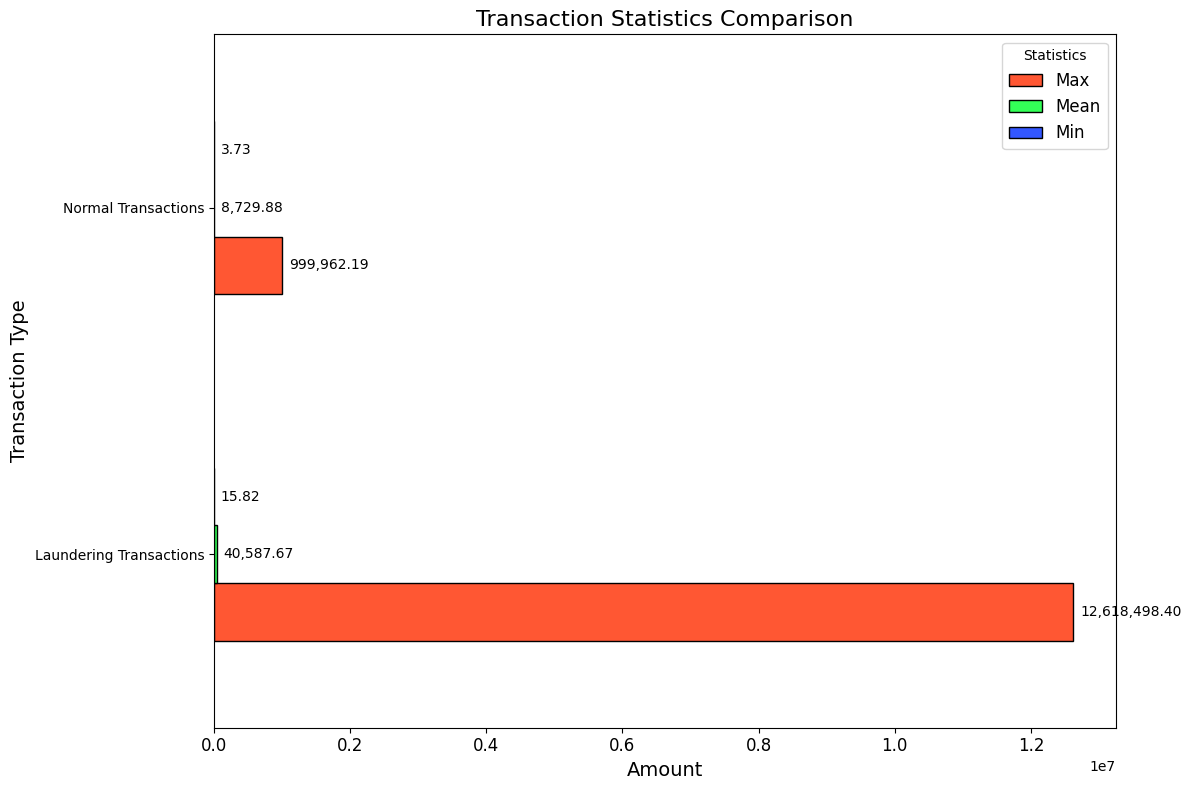

In [ ]:
# Prepare data for visualization
stats_data = pd.DataFrame({
    "Laundering Transactions": laundering_stats,
    "Normal Transactions": normal_stats
})

# Transpose to make stats the x-axis
stats_data = stats_data.T  # Transpose the DataFrame

# Visualization
plt.figure(figsize=(20, 10))

# Plot the data
ax = stats_data.plot(
    kind='barh',
    figsize=(12, 8),
    edgecolor='black',
    color=['#FF5733', '#33FF57', '#3357FF']
)

# Add labels and title
plt.title("Transaction Statistics Comparison", fontsize=16)
plt.xlabel("Amount", fontsize=14)
plt.ylabel("Transaction Type", fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Adjust x-axis labels
plt.legend(title="Statistics", labels=["Max", "Mean", "Min"], fontsize=12)

# Add value labels to the bars
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # Get bar width (value)
        if width > 0:  # Avoid adding labels to empty bars
            ax.annotate(f'{width:,.2f}',  # Format the label (2 decimal places)
                        xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(5, 0),  # Offset the text slightly
                        textcoords="offset points",
                        ha='left', va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

####Identify most frequent typologies for laundering transactions

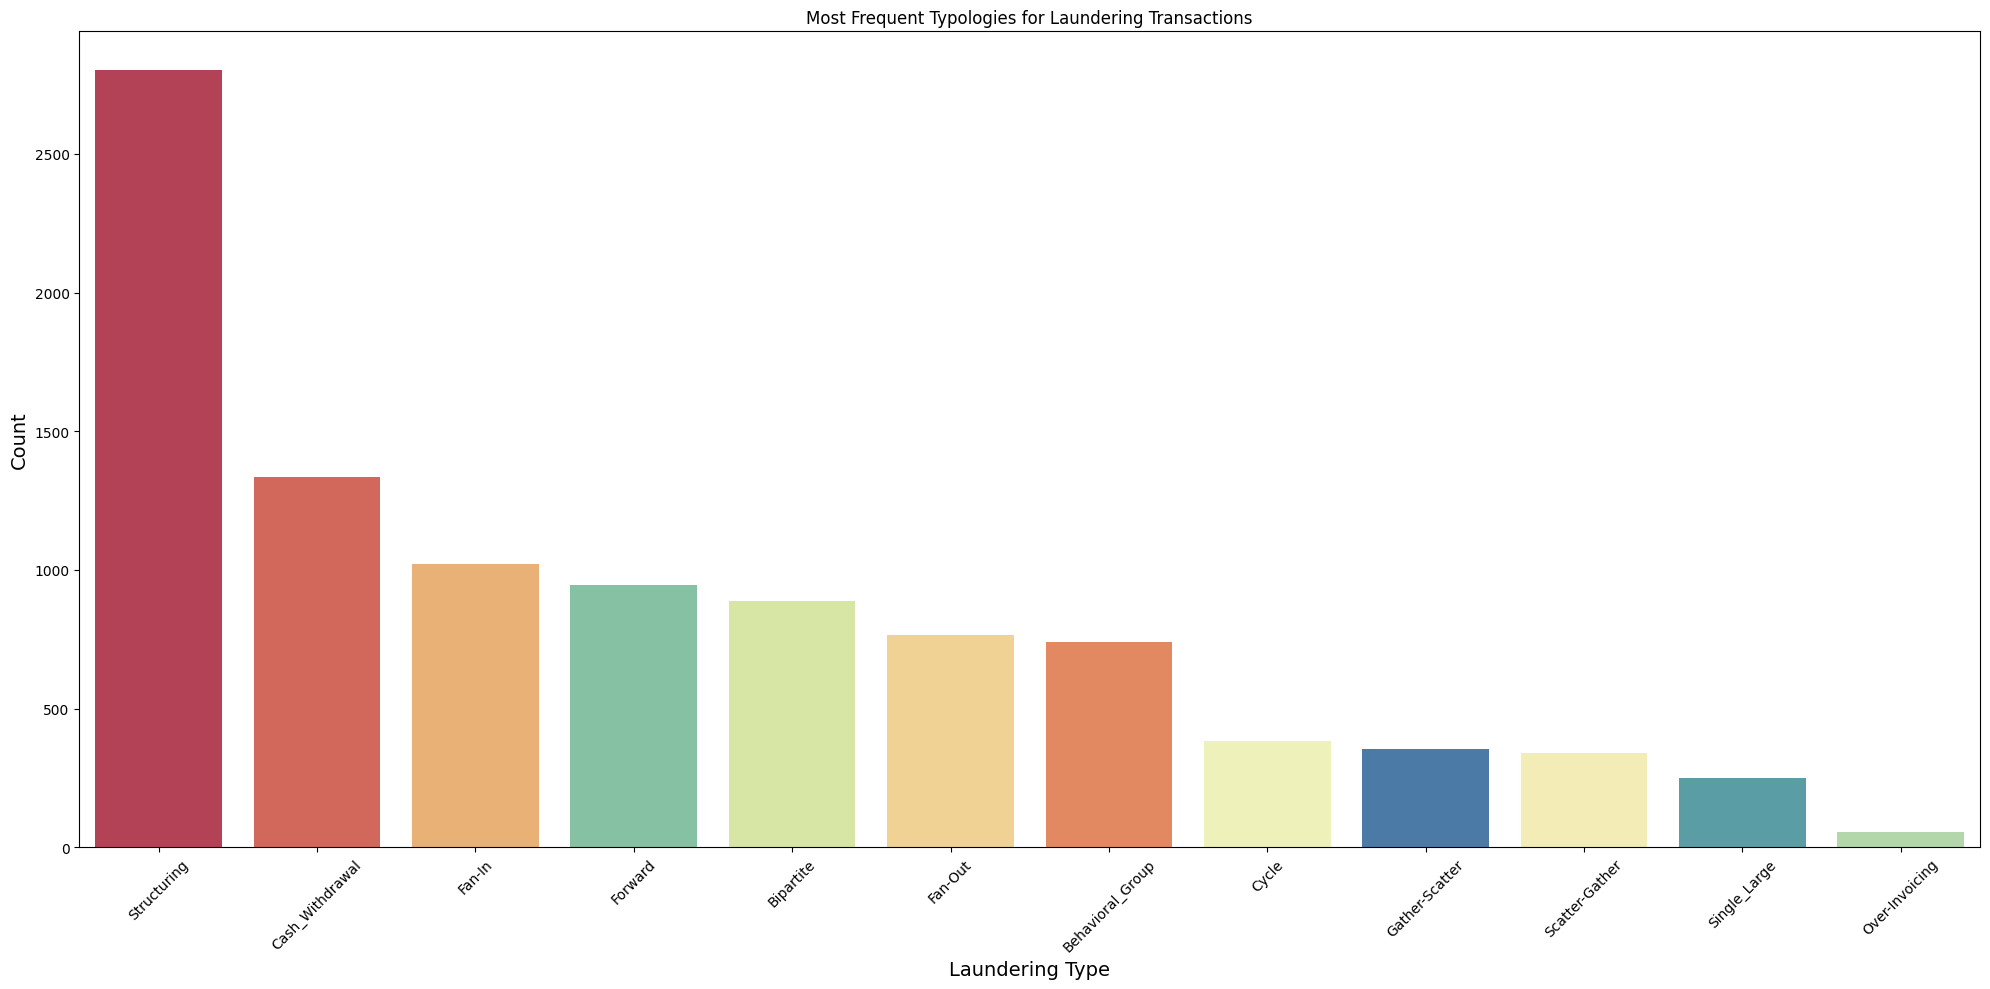

In [ ]:
plt.figure(figsize=(20, 10))
laundering_counts = df[df['Is_laundering'] == 1]['Laundering_Structure'].value_counts()

sns.countplot(
    data=df[df['Is_laundering'] == 1],
    x='Laundering_Structure',
    order=laundering_counts.index,
    hue='Laundering_Structure',
    palette='Spectral',
    dodge=False,
    legend=False
)

plt.xticks(rotation=45)
plt.title('Most Frequent Typologies for Laundering Transactions')
plt.xlabel('Laundering Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

####Identify Most Frequent Payment Types for Laundering Transactions

In [ ]:
#number of laundering transactions per payment type
laundering_transactions_per_payment_type = df[df['Is_laundering'] == 1].groupby('Payment_type').size()
laundering_transactions_per_payment_type.name = 'Total Laundering Transactions'

#Display as a DataFrame
print(laundering_transactions_per_payment_type.reset_index())

      Payment_type  Total Laundering Transactions
0              ACH                           1159
1     Cash Deposit                           1405
2  Cash Withdrawal                           1334
3           Cheque                           1087
4      Credit card                           1136
5     Cross-border                           2628
6       Debit card                           1124


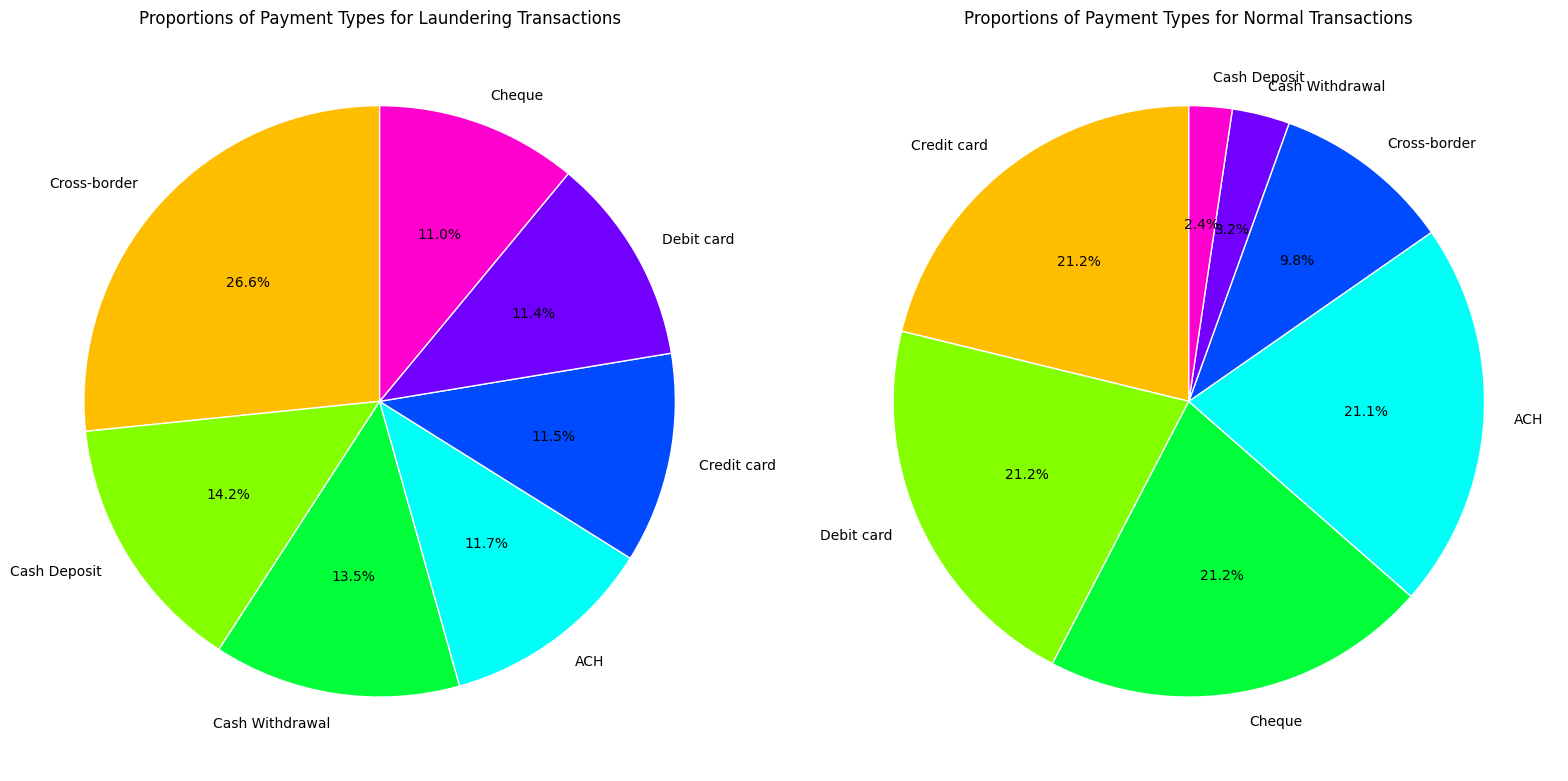

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size for two pie charts

# Calculate counts for laundering and normal payment types
laundering_counts = df[df['Is_laundering'] == 1]['Payment_type'].value_counts()
normal_counts = df[df['Is_laundering'] == 0]['Payment_type'].value_counts()

# Generate unique color palettes for consistency
colors = sns.color_palette('hsv', len(laundering_counts))

# Subplot 1: Laundering Transactions
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.pie(
    laundering_counts.values,
    labels=laundering_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportions of Payment Types for Laundering Transactions')

# Subplot 2: Normal Transactions
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.pie(
    normal_counts.values,
    labels=normal_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,  # Use the same colors for consistency
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportions of Payment Types for Normal Transactions')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

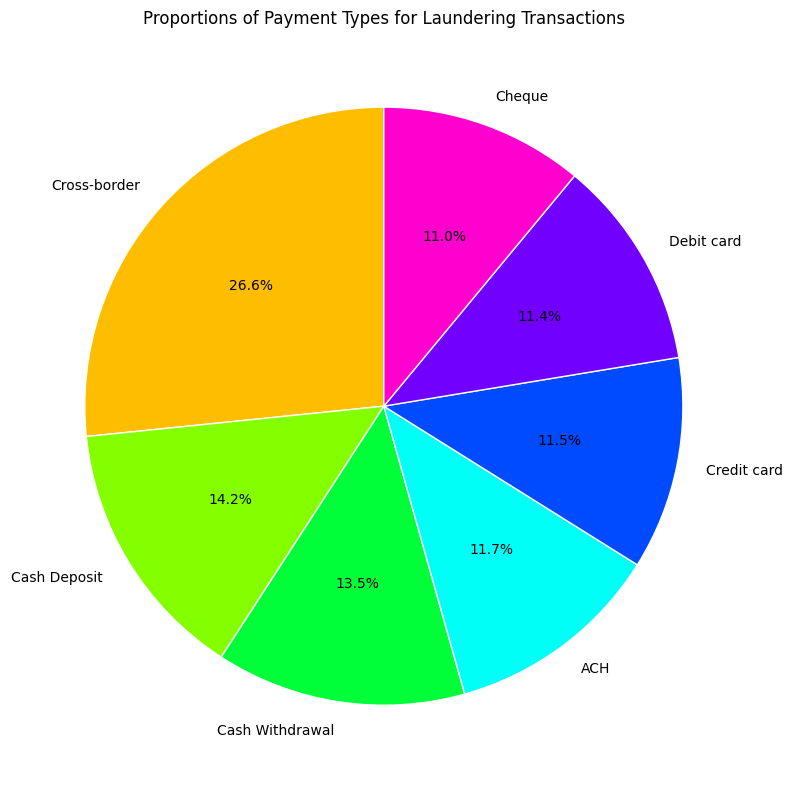

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Calculate counts for laundering payment types
laundering_counts = df[df['Is_laundering'] == 1]['Payment_type'].value_counts()

# Generate a unique color palette with the same number of colors as the slices
colors = sns.color_palette('hsv', len(laundering_counts))  # Use the 'hsv' colormap for varied colors

# Plot pie chart
plt.pie(
    laundering_counts.values,  # Values to plot
    labels=laundering_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=90,  # Rotate pie for better readability
    colors=colors,  # Apply unique colors
    wedgeprops={'edgecolor': 'white'}  # Add white edges for better distinction
)

# Add title
plt.title('Proportions of Payment Types for Laundering Transactions')

# Show the plot
plt.tight_layout()
plt.show()

####Identify Count of Laundering Transactions by Pair Bank Locations

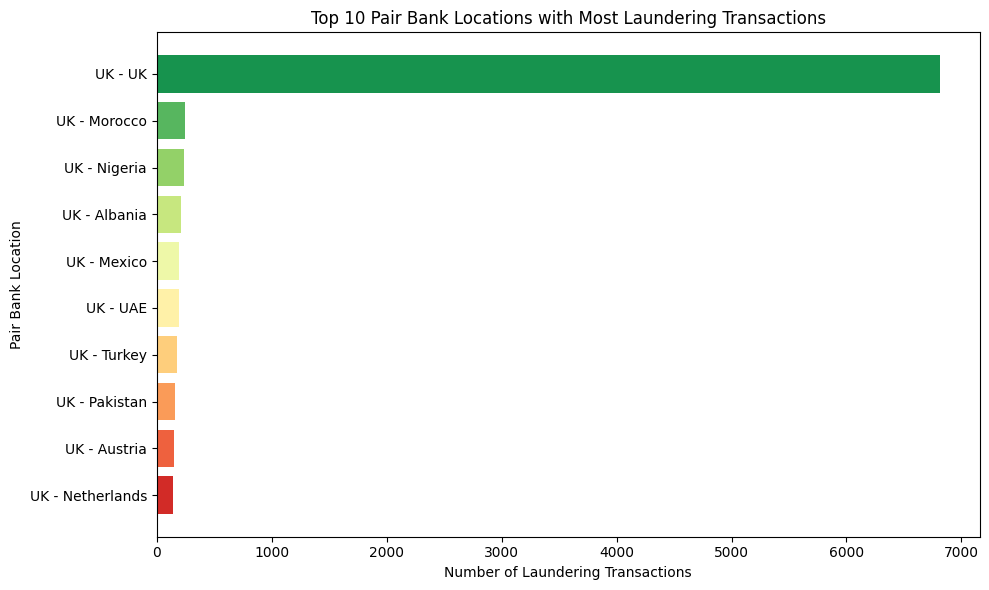

In [ ]:
# Group and sort data
laundering_per_location = df.groupby('Pair_bank_location')['Is_laundering'].sum().reset_index()
laundering_per_location = laundering_per_location.sort_values(by='Is_laundering', ascending=False)

# Take only the top 10
top10_locations = laundering_per_location.head(10)

# Generate a color palette
colors = sns.color_palette('RdYlGn_r', len(top10_locations))  # Reverse for high = red

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top10_locations['Pair_bank_location'], top10_locations['Is_laundering'], color=colors)
plt.xlabel('Number of Laundering Transactions')
plt.ylabel('Pair Bank Location')
plt.title('Top 10 Pair Bank Locations with Most Laundering Transactions')
plt.gca().invert_yaxis()  # Highest at the top

plt.tight_layout()
plt.show()

In [ ]:
# Filter rows where Pair_bank_location is NOT 'UK-UK'
non_uk_df = df[df['Pair_bank_location'] != 'UK - UK']

# Group by Pair_bank_location and Laundering_type to see counts
laundering_types_by_location = non_uk_df.groupby(['Pair_bank_location', 'Payment_type'])['Is_laundering'].sum().reset_index()

# sort by highest laundering count
laundering_types_by_location = laundering_types_by_location.sort_values(by='Is_laundering', ascending=False)

# Display the result
print(laundering_types_by_location)

    Pair_bank_location  Payment_type  Is_laundering
337       UK - Albania  Cross-border            201
352       UK - Morocco  Cross-border            194
356       UK - Nigeria  Cross-border            181
362        UK - Turkey  Cross-border            173
354   UK - Netherlands  Cross-border            133
..                 ...           ...            ...
367      USA - Albania  Cross-border              0
384          USA - USA           ACH              0
385          USA - USA        Cheque              0
386          USA - USA   Credit card              0
387          USA - USA    Debit card              0

[388 rows x 3 columns]


In [ ]:
# Filter rows for 'Cash Border' payment type
cross_border_df = df[df['Payment_type'] == 'Cross-border']

# Group by Pair_bank_location and sum laundering flags
top_cross_border_locations = (
    cross_border_df.groupby('Pair_bank_location')['Is_laundering']
    .sum()
    .reset_index()
    .sort_values(by='Is_laundering', ascending=False)
)

# Display top N (e.g., top 10)
top_n = 10
print(top_cross_border_locations.head(top_n))

    Pair_bank_location  Is_laundering
272       UK - Albania            201
280       UK - Morocco            194
282       UK - Nigeria            181
286        UK - Turkey            173
281   UK - Netherlands            133
283      UK - Pakistan            130
287           UK - UAE            127
273       UK - Austria            126
279        UK - Mexico            123
277         UK - Italy            120


####Identify Average Monthly Transactions Amount by Transactions Type

In [ ]:
average_transactions = df.groupby(['Year-Month', 'Is_laundering'])['Amount'].mean().unstack()
average_transactions

Is_laundering,0,1
Year-Month,,
2022-10,8694.868942,26885.332040
2022-11,8646.713555,73472.947836
2022-12,8840.117463,33175.336909
2023-01,8827.964270,41949.757851
2023-02,8698.100966,29227.505709
2023-03,8918.772393,31951.595670
2023-04,8825.465073,30336.138455
2023-05,8615.085020,65756.631623
2023-06,8634.518612,45245.846035


In [ ]:
# Group by year-month and transaction type to count transactions
monthly_frequency = df.groupby(['Year-Month', 'Is_laundering']).size().unstack()
monthly_frequency

Is_laundering,0,1
Year-Month,,
2022-10,707960,694
2022-11,896827,794
2022-12,899434,907
2023-01,907380,940
2023-02,903860,946
2023-03,907635,927
2023-04,901921,962
2023-05,916735,866
2023-06,896219,1024


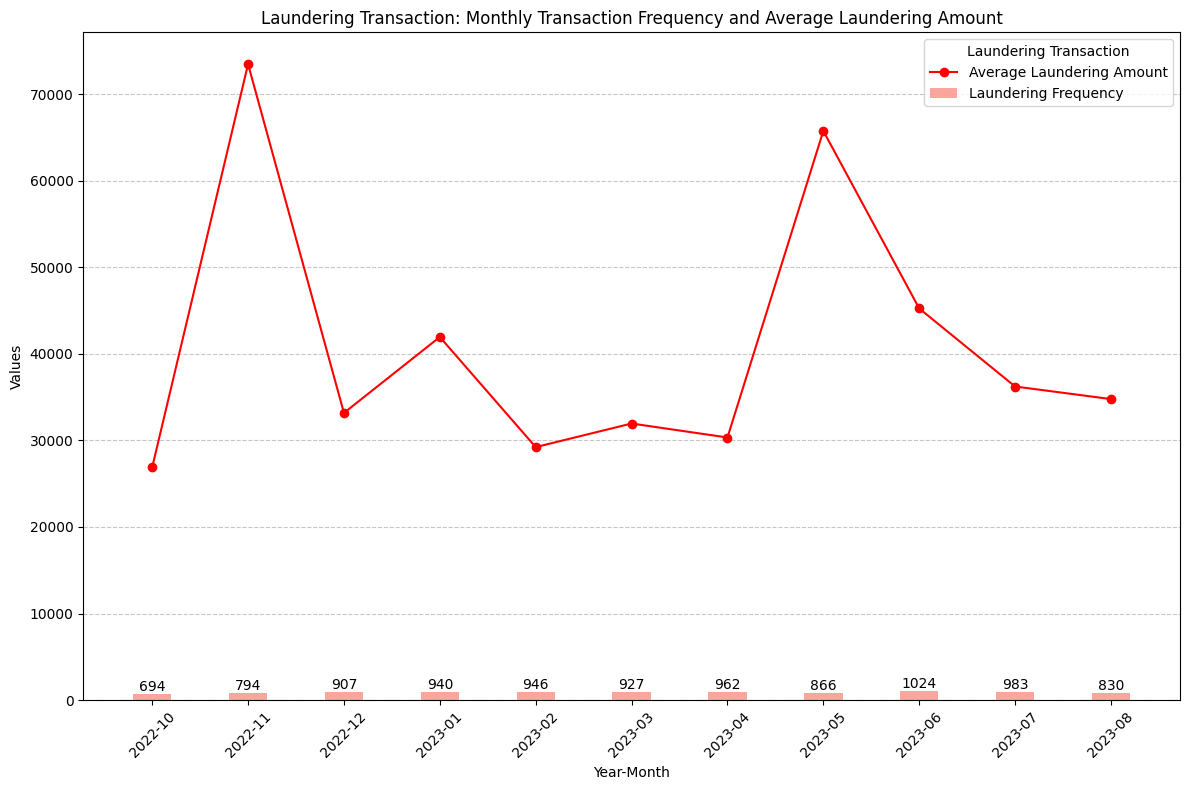

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart for monthly frequency
bar_width = 0.4  # Width of the bars
x = np.arange(len(monthly_frequency.index))  # X positions for the bars

# Plot bars for normal and laundering transaction frequencies
bars = plt.bar(
    x,
    monthly_frequency[1],
    width=bar_width,
    label='Laundering Frequency',
    color='salmon',
    alpha=0.7
)

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.0f}',  # Format the value (no decimals in this case)
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Plot the line chart for average amounts
plt.plot(
    x,
    average_transactions[1],
    label='Average Laundering Amount',
    color='red',
    marker='o'
)

# Add titles and labels
plt.title('Laundering Transaction: Monthly Transaction Frequency and Average Laundering Amount')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.xticks(x, monthly_frequency.index, rotation=45)  # Use year-month as x-axis labels

# Add legend and grid
plt.legend(title='Laundering Transaction', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

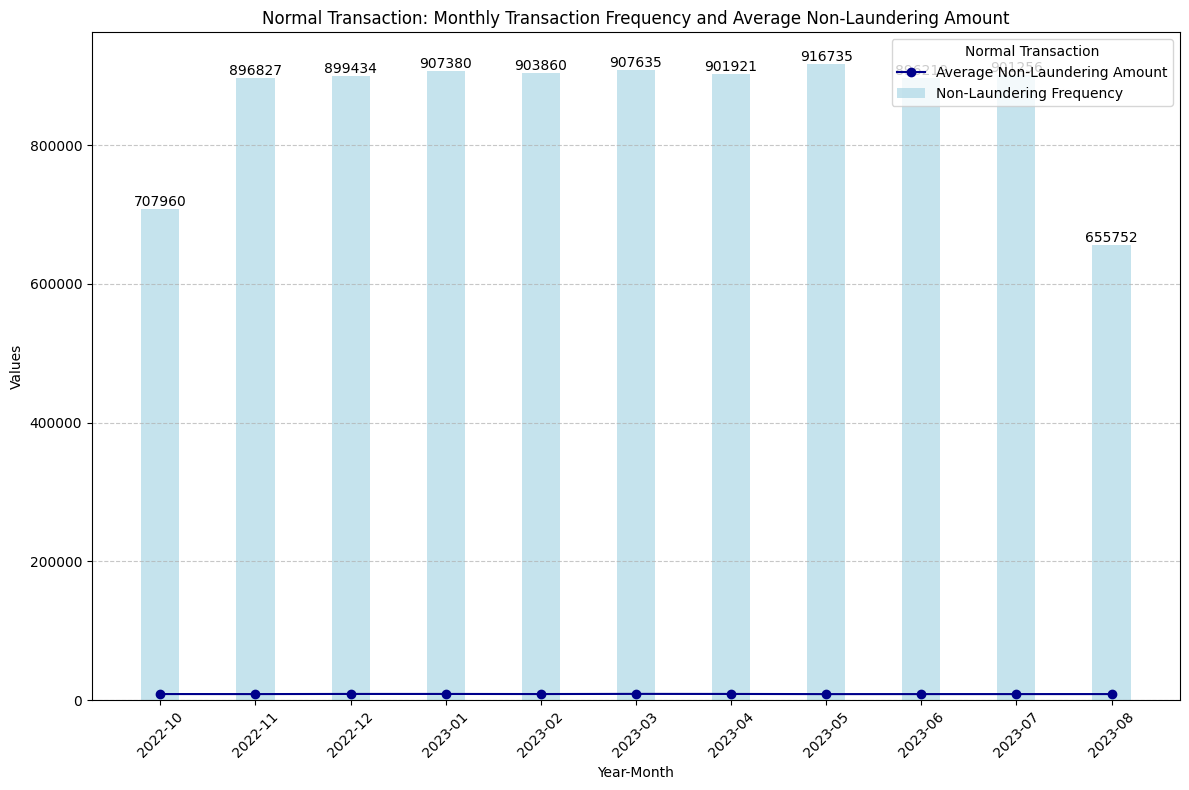

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart for monthly frequency
bar_width = 0.4  # Width of the bars
x = np.arange(len(monthly_frequency.index))  # X positions for the bars

# Plot bars for normal and laundering transaction frequencies
bars = plt.bar(
    x,
    monthly_frequency[0],
    width=bar_width,
    label='Non-Laundering Frequency',
    color='lightblue',
    alpha=0.7
)

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.0f}',  # Format the value (no decimals in this case)
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Plot the line chart for average amounts
plt.plot(
    x,
    average_transactions[0],
    label='Average Non-Laundering Amount',
    color='darkblue',
    marker='o'
)

# Add titles and labels
plt.title('Normal Transaction: Monthly Transaction Frequency and Average Non-Laundering Amount')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.xticks(x, monthly_frequency.index, rotation=45)  # Use year-month as x-axis labels

# Add legend and grid
plt.legend(title='Normal Transaction', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

####Identify whether laundering transactions occur at day or at night

In [ ]:
TimeOfDaySuspicious = df[df['Is_laundering'] == 1]['TimeOfDay'].value_counts()
TimeOfDayNormal = df[df['Is_laundering'] == 0]['TimeOfDay'].value_counts()
print(TimeOfDaySuspicious)
print(TimeOfDayNormal)

TimeOfDay
Day      7189
Night    2684
Name: count, dtype: int64
TimeOfDay
Day      6946177
Night    2548802
Name: count, dtype: int64


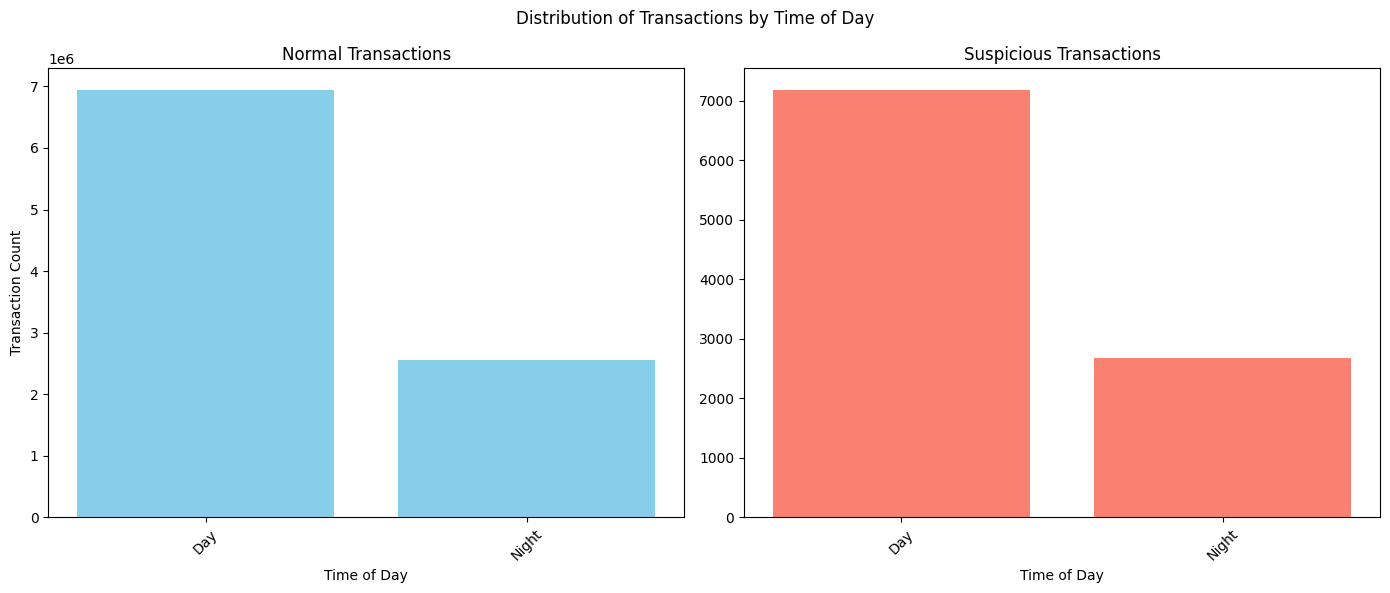

In [ ]:
TimeOfDaySuspicious = df[df['Is_laundering'] == 1]['TimeOfDay'].value_counts().sort_index()
TimeOfDayNormal = df[df['Is_laundering'] == 0]['TimeOfDay'].value_counts().sort_index()

# Set up figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot normal transactions
axes[0].bar(TimeOfDayNormal.index, TimeOfDayNormal.values, color='skyblue')
axes[0].set_title('Normal Transactions')
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Transaction Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot suspicious transactions
axes[1].bar(TimeOfDaySuspicious.index, TimeOfDaySuspicious.values, color='salmon')
axes[1].set_title('Suspicious Transactions')
axes[1].set_xlabel('Time of Day')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Transactions by Time of Day')
plt.tight_layout()
plt.show()

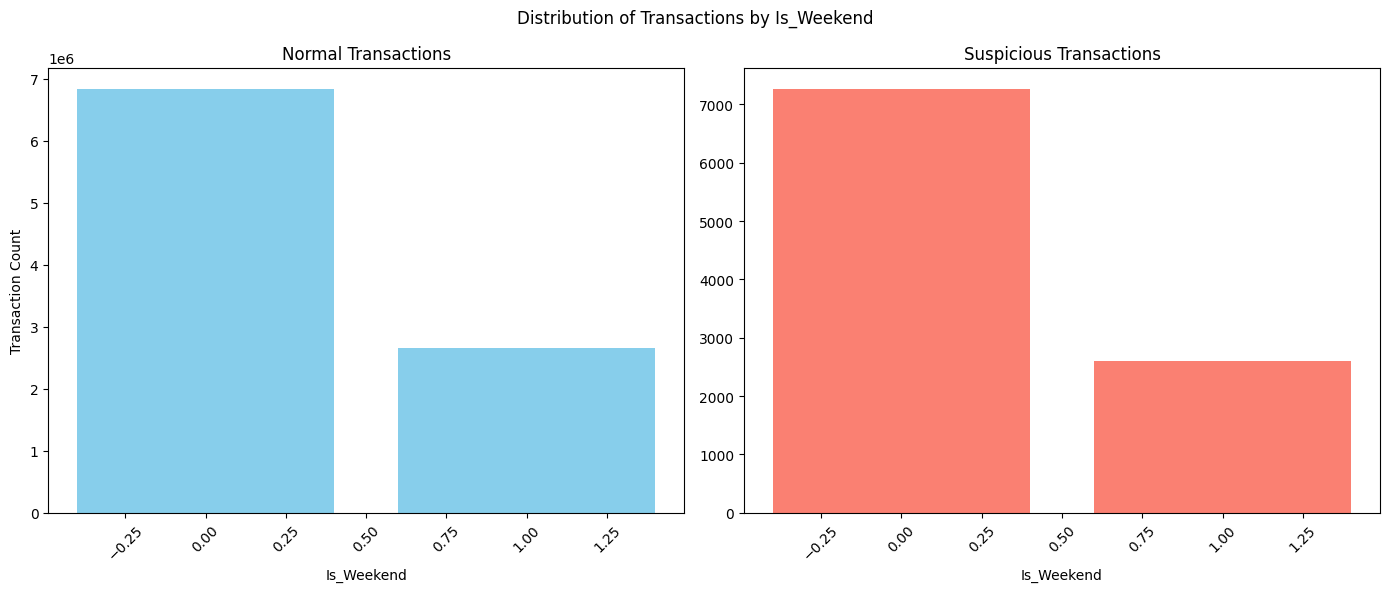

,Suspicious,Normal
Is_weekend,,
0,7267,6837934
1,2606,2657045


In [ ]:
WeekendSuspicious = df[df['Is_laundering'] == 1]['Is_weekend'].value_counts()
WeekendNormal = df[df['Is_laundering'] == 0]['Is_weekend'].value_counts()

# Set up figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot normal transactions
axes[0].bar(WeekendNormal.index, WeekendNormal.values, color='skyblue')
axes[0].set_title('Normal Transactions')
axes[0].set_xlabel('Is_Weekend')
axes[0].set_ylabel('Transaction Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot suspicious transactions
axes[1].bar(WeekendSuspicious.index, WeekendSuspicious.values, color='salmon')
axes[1].set_title('Suspicious Transactions')
axes[1].set_xlabel('Is_Weekend')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Transactions by Is_Weekend')
plt.tight_layout()
plt.show()

# Combine into one DataFrame for easier plotting
Weekend_df = pd.DataFrame({
    'Suspicious': WeekendSuspicious,
    'Normal': WeekendNormal
})

Weekend_df